# Descargar noticias de un medio digital

En esta práctica vamos a descargar los titulares de las noticias de un medio de comunicación digital

## Importar las librerías que necesitaremos

Vamos a utilizar urllib3 y Beautiful Soup

In [19]:
#!/usr/bin/env python

import urllib3, nltk
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import json

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librerías básicas
import numpy as np
import pandas as pd

# Expresión regular
import re


## Descargar la página

Emplearemos un UserAgent (navegador) de móvil para identificarnos con la página

Al tener los medios de comunicación en un archivo json aparte realizo la carga del fichero y introduzco las urls en un diccionario

In [20]:
filename = 'urls.json'
with open(filename) as f:
        # Cargar su contenido y crear un diccionario
        dic_urls = json.load(f)
dic_urls

{'20min': {'url': 'http://20minutos.es'},
 'elpais': {'url': 'http://www.elpais.com'},
 'elmundo': {'url': 'http://www.elmundo.es'},
 'lavoz': {'url': 'http://www.lavozdegalicia.es'}}

Se elige cualquier medio digital de las urls y se realiza la extracción del response de los datos del HTML.

In [23]:

url = dic_urls['20min']['url']

def get_data(url):
    ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
    h = {"User-Agent": ua}
    manager = urllib3.PoolManager()
    response = manager.request('GET', url, fields=None, headers=h)
    return response




> Se recogen los textos que haya en las etiquetas HTML h1, h2, h3, h4 y h5 para la extracción de los titulares.

In [28]:

response = get_data(url).data

def sacar_titulares(response):
    texto=""
    soup = BeautifulSoup(response, 'html.parser')
    texto+=" ".join(list(map(lambda x: x.text,soup.find_all(['h1','h2','h3','h4','h5','h6']))))
    return texto

print(sacar_titulares(response))

Muere la mujer estrangulada el sábado por su pareja en Vallecas Ala Octa, el colirio que ha causado ceguera irreversible en centenares de pacientes La Autoridad Palestina da las gracias a Sánchez por sus palabras en contra de Israel: "España habló en voz alta" Yafa, Channa, Ruth... las vidas detrás de las ancianas y las niñas liberadas por Hamás Roni Krivoi, el rehén liberado por Hamás que intentó escapar por su propio pie de Gaza Otegi rechaza ser candidato y facilita al PSOE apoyar a Bildu en los comicios: "Tengo un pasado" Feijóo nombra a Miguel Tellado nuevo portavoz del PP en el Congreso Weber critica el pacto del PSOE con Junts: "¡Pero qué locura es esta! El Gobierno español en manos de una instancia en Ginebra..." Gobierno y Junta ofrecen 100.000 euros por hectárea a los agricultores de Doñana por abandonar sus cultivos El gesto con la mano de una rehén a un miliciano de Hamás en el momento de ser liberada Detenido un hombre de 26 años por el presunto asesinato de su expareja y 

## Quitar código HTML

In [76]:
sopa = BeautifulSoup(r.data, "html.parser")
web_solotexto = sopa.get_text()

salida = ''
#excluirlineas=4

for linea in web_solotexto.split('\n'):
    aux=linea.strip()
    if aux and len(aux) > 50:
        salida += aux + '\n'
        #if not aux.startswith('Comentarios ('):
        #    excluirlineas=excluirlineas-1
        #    if (excluirlineas < 0):
        #        vartext2 = vartext2 + aux + '\n'

print (salida)

#Otra forma, quizás más elegante:
titulares = sopa.find_all('h4')

for titular in titulares:
    print(titular.get_text().strip())

20minutos.es | Diario abierto | Última hora, local, España y el mundo
HUELGA DE TRENESLos sindicatos llegan a un acuerdo in extremis y desconvocan la huelga
El cierre de la lista de rehenes y prisioneros retrasa la tregua entre Israel y Hamás, que se espera que empiece mañana
Hizbulá ataca Israel con 48 cohetes, la mayor ofensiva desde el inicio de la guerraSigue en directo la última hora y todas las claves del conflictoSánchez apoya ante Abbas que la Autoridad Palestina  asuma el control de Gaza
Campo se abstiene de debatir la amnistía en el TC porque siendo ministro dijo que era "inconstitucional"
Díez, Pumpido, Campo... Así está compuesto el Constitucional que decidirá sobre la amnistía
Desconvocada la huelga de trenes: los sindicatos y el Ministerio alcanzan un acuerdo 'in extremis'
Investigadores de OpenAI alertaron de "un poderoso descubrimiento" de IA que amenazaba a la humanidad
Enviaron una carta a la dirección dos día antes del despido de Sam Altman.Quienes son los rostros de

> Para quitar el texto de una noticia de 'El Mundo'

In [37]:

web_solotexto = BeautifulSoup(r.data).get_text()

def elmundo_noticia(web_solotexto):
    salida = ''
    contador = 0
    excluirlineas=6
    vartext2 = ''

    for linea in web_solotexto.split('\n'):
        contador += 1
        aux=linea.strip()
        if aux and len(aux) > 50:
            salida += aux + '\n'
            if not aux.startswith('Comentarios ('):
                excluirlineas=excluirlineas-1
                if (excluirlineas < 0):
                    vartext2 = vartext2 + aux + '\n'

    lista_lineas = vartext2.split('\n')
    texto_noticia = lista_lineas[0][5:]
    return texto_noticia


texto = elmundo_noticia(web_solotexto)


**Limpeza do texto**

In [29]:
#Generación de lista de signos de puntuación

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [30]:
stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [31]:
#Reemplazamos signos de puntuación por "":

for sw in stop_words:
    clean_texto = texto.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

clean_texto



'muere mujer estrangulada sábado pareja vallecas ala octa colirio causado ceguera irreversible centenares pacientes autoridad palestina da gracias sánchez palabras israel españa habló voz alta yafa channa ruth vidas detrás ancianas niñas liberadas hamás roni krivoi rehén liberado hamás intentó escapar propio pie gaza otegi rechaza candidato facilita psoe apoyar bildu comicios pasado feijóo nombra miguel tellado nuevo portavoz pp congreso weber critica pacto psoe junts locura gobierno español manos instancia ginebra gobierno junta ofrecen 100000 euros hectárea agricultores doñana abandonar cultivos gesto mano rehén miliciano hamás momento liberada detenido hombre 26 años presunto asesinato expareja hija ambos 5 años ala octa colirio causado ceguera centenares pacientes nunca veré nietos mueren asesinados brasil cocinero mallorquín david peregrina mujer sánchez elige espadas nuevo portavoz senado ratifica patxi lópez congreso quejas usuarios cercanías cortes tras descarrilamiento alguien

### Creación de la lista de palabras

In [32]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

palabras

['muere',
 'mujer',
 'estrangulada',
 'sábado',
 'pareja',
 'vallecas',
 'ala',
 'octa',
 'colirio',
 'causado',
 'ceguera',
 'irreversible',
 'centenares',
 'pacientes',
 'autoridad',
 'palestina',
 'gracias',
 'sánchez',
 'palabras',
 'israel',
 'españa',
 'habló',
 'voz',
 'alta',
 'yafa',
 'channa',
 'ruth',
 'vidas',
 'detrás',
 'ancianas',
 'niñas',
 'liberadas',
 'hamás',
 'roni',
 'krivoi',
 'rehén',
 'liberado',
 'hamás',
 'intentó',
 'escapar',
 'propio',
 'pie',
 'gaza',
 'otegi',
 'rechaza',
 'candidato',
 'facilita',
 'psoe',
 'apoyar',
 'bildu',
 'comicios',
 'pasado',
 'feijóo',
 'nombra',
 'miguel',
 'tellado',
 'nuevo',
 'portavoz',
 'congreso',
 'weber',
 'critica',
 'pacto',
 'psoe',
 'junts',
 'locura',
 'gobierno',
 'español',
 'manos',
 'instancia',
 'ginebra',
 'gobierno',
 'junta',
 'ofrecen',
 '100000',
 'euros',
 'hectárea',
 'agricultores',
 'doñana',
 'abandonar',
 'cultivos',
 'gesto',
 'mano',
 'rehén',
 'miliciano',
 'hamás',
 'momento',
 'liberada',
 'de

**Contaxe de palabras**

In [33]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        # Va sumando el número de veces que se repite la palabra
        word_count[palabra][0]+=1
    else:
        # Si aún no se repite, se añade la palabra nueva al diccionario.
        word_count[palabra]=[1]

word_count

{'muere': [3],
 'mujer': [3],
 'estrangulada': [2],
 'sábado': [2],
 'pareja': [3],
 'vallecas': [2],
 'ala': [3],
 'octa': [3],
 'colirio': [3],
 'causado': [3],
 'ceguera': [3],
 'irreversible': [2],
 'centenares': [3],
 'pacientes': [3],
 'autoridad': [1],
 'palestina': [1],
 'gracias': [2],
 'sánchez': [3],
 'palabras': [1],
 'israel': [1],
 'españa': [7],
 'habló': [1],
 'voz': [1],
 'alta': [3],
 'yafa': [1],
 'channa': [1],
 'ruth': [1],
 'vidas': [1],
 'detrás': [2],
 'ancianas': [1],
 'niñas': [1],
 'liberadas': [1],
 'hamás': [3],
 'roni': [1],
 'krivoi': [1],
 'rehén': [2],
 'liberado': [1],
 'intentó': [1],
 'escapar': [1],
 'propio': [2],
 'pie': [1],
 'gaza': [1],
 'otegi': [1],
 'rechaza': [2],
 'candidato': [1],
 'facilita': [1],
 'psoe': [2],
 'apoyar': [1],
 'bildu': [1],
 'comicios': [1],
 'pasado': [1],
 'feijóo': [2],
 'nombra': [1],
 'miguel': [1],
 'tellado': [1],
 'nuevo': [6],
 'portavoz': [2],
 'congreso': [3],
 'weber': [1],
 'critica': [1],
 'pacto': [2],
 '

In [34]:
#Generamos el DF y lo ordenamos:
df = pd.DataFrame.from_dict(word_count).transpose() # transpose = CAMBIAR
df


,0
muere,3
mujer,3
estrangulada,2
sábado,2
pareja,3
...,...
aviso,1
legal,1
cookies,1
contacto,1


**Mostrar gráfica de ocorrencias das palabras**

In [35]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

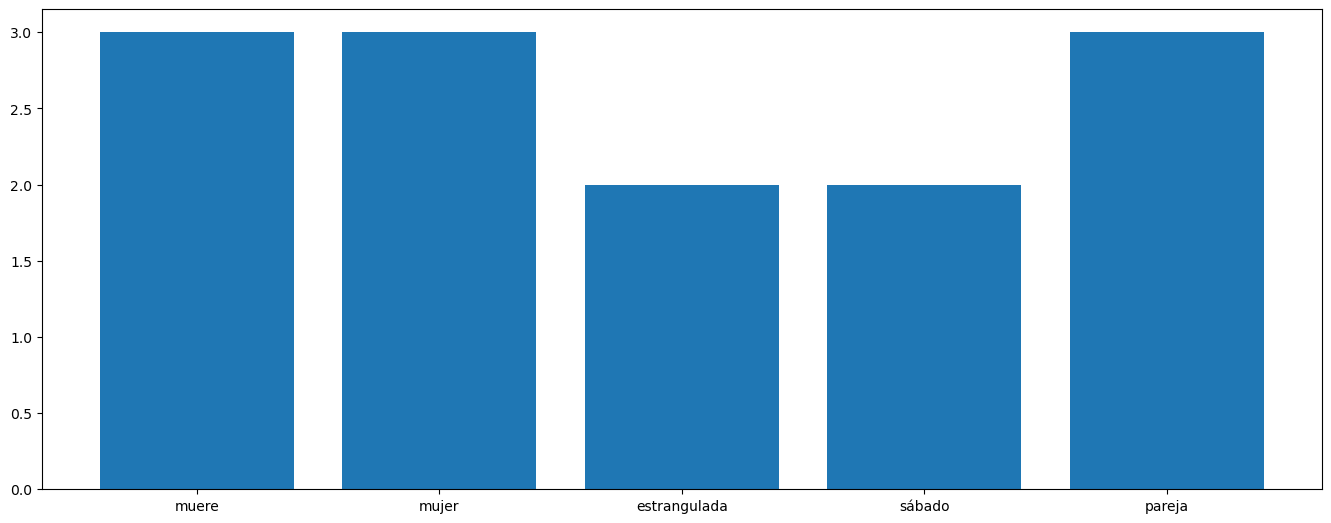

In [36]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

**Crear nube de palabras**

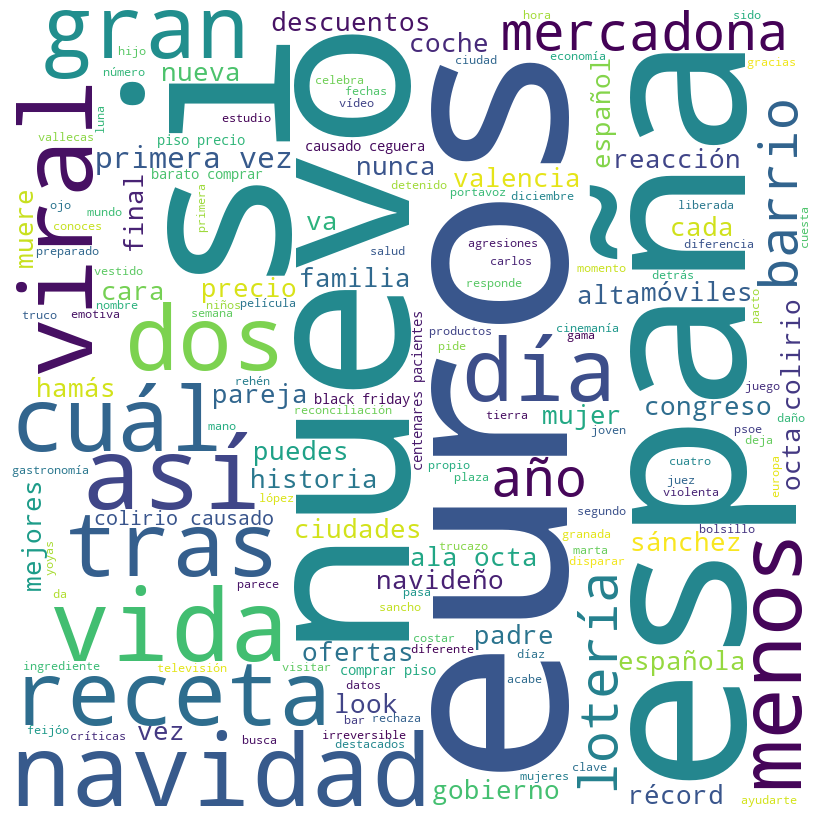

In [37]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)


word_cloud.to_file("C:\\Users\\daniel.martinezcarre\\Downloads\\nube_ampliacion_1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()